#### 재정자립도
- 행정안전부
    - 5년 동안의 ( 지차체의 자체 수입의 합 / 지차체 예산규모의 합) * 100
    - 최근 5년간 지자체 일반회계 규모 대비 자체수입 변화를 통해 지방재정의 여건 반영

- 추출 데이터 재정자립도
    - 재정자립도=(자체수입÷자치단체 예산규모)×100(%)
    - 재정자립도: 일반회계의 세입중 지방세와 세외수입의 비율
    - 재정수입의 자체 충당 능력을 나타내는 세입분석지표로 재정자립도가 높을수록 재정운영의 자립능력이 우수함을 의미
    - 자생적 지역경제 생태계조성을 위한 재정지원, 지방재정의 발전적 운영 등에 활용
    
    - 데이터 출처
        - 행정안전부(재정정책과), 2022, 2022.12.23, 재정자립도(시도/시/군/구)
        - https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1YL20921&conn_path=I2

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [83]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [94]:
data_original = pd.read_csv("./data/재정자립도_시군구_2016_2020.csv")

In [95]:
data_original.head()
data_original.info()

,행정구역별(1),행정구역별(2),2016,2017,2018,2019,2020
0,행정구역별(1),행정구역별(2),재정자립도(세입과목개편후),재정자립도(세입과목개편후),재정자립도(세입과목개편후),재정자립도(세입과목개편후),재정자립도(세입과목개편후)
1,부산광역시,소계,50.9,52.9,52.3,50.0,49.2
2,부산광역시,중구,21.7,22.8,21.4,22.2,23.6
3,부산광역시,서구,10.3,11.4,11.6,11.7,12.2
4,부산광역시,동구,14.8,15.3,15.3,15.6,15.8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   행정구역별(1)  217 non-null    object
 1   행정구역별(2)  217 non-null    object
 2   2016      217 non-null    object
 3   2017      217 non-null    object
 4   2018      217 non-null    object
 5   2019      217 non-null    object
 6   2020      217 non-null    object
dtypes: object(7)
memory usage: 12.0+ KB


In [96]:
data_set = data_original

In [97]:
data_set.rename(columns={"행정구역별(1)":"sido","행정구역별(2)":"sigungu"},inplace=True)
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   sido     217 non-null    object
 1   sigungu  217 non-null    object
 2   2016     217 non-null    object
 3   2017     217 non-null    object
 4   2018     217 non-null    object
 5   2019     217 non-null    object
 6   2020     217 non-null    object
dtypes: object(7)
memory usage: 12.0+ KB


In [98]:
locations = ["동구", "서구", "영도구", "남구", "강화군", "옹진군", "가평군", "연천군", "고성군", "삼척시", "양구군", "양양군",
             "영월군", "정선군", "철원군", "태백시", "평창군", "홍천군", "화천군", "횡성군", "괴산군", "단양군", "보은군", "영동군",
             "옥천군", "제천시", "공주시", "금산군", "논산시", "보령시", "부여군", "서천군", "예산군", "청양군", "태안군", "고창군", "김제시",
             "남원시", "무주군", "부안군", "순창군", "임실군", "장수군", "정읍시", "진안군", "강진군", "고흥군", "곡성군", "구례군", "담양군",
             "보성군", "신안군", "영광군", "영암군", "완도군", "장성군", "장흥군", "진도군", "함평군", "해남군", "화순군", "고령군", "군위군",
             "문경시", "봉화군", "상주시", "성주군", "안동시", "영덕군", "영양군", "영주시", "영천시", "울릉군", "울진군", "의성군", "청도군",
             "청송군", "거창군", "남해군", "밀양시", "산청군", "의령군", "창녕군", "하동군", "함안군", "함양군", "합천군"]

In [99]:
# 인구감소지역 인덱스 찾기
danger_idx = []
for loc in locations:
    idx = data_set[data_set["sigungu"]==loc].index
    danger_idx.extend(idx)
    
print(len(danger_idx))

# 위에서 찾은 인덱스로 지역 특정
danger_loc = data_set.iloc[danger_idx]

# 구 이름이 중복되는 지역 찾기
danger_loc["sigungu"].value_counts()

101


동구     6
서구     5
남구     5
고성군    2
장성군    1
      ..
논산시    1
금산군    1
공주시    1
제천시    1
합천군    1
Name: sigungu, Length: 87, dtype: int64

In [100]:
# 위험지역 동구, 서구, 남구, 고성군 데이터 수정
danger_loc[danger_loc["sigungu"]=="동구"]
danger_loc[danger_loc["sigungu"]=="서구"]
danger_loc[danger_loc["sigungu"]=="남구"]

,sido,sigungu,2016,2017,2018,2019,2020
4,부산광역시,동구,14.8,15.3,15.3,15.6,15.8
20,대구광역시,동구,16.9,17.9,17.0,16.9,17.9
29,인천광역시,동구,13.7,13.4,10.4,9.0,11.5
40,광주광역시,동구,13.4,14.0,13.6,11.7,13.8
46,대전광역시,동구,12.5,12.2,11.5,10.8,11.0
54,울산광역시,동구,25.5,23.1,20.7,18.6,18.6


,sido,sigungu,2016,2017,2018,2019,2020
3,부산광역시,서구,10.3,11.4,11.6,11.7,12.2
21,대구광역시,서구,14.9,13.7,13.7,13.1,13.7
35,인천광역시,서구,36.6,36.7,33.4,33.2,31.9
41,광주광역시,서구,20.7,21.9,20.4,20.1,19.0
48,대전광역시,서구,20.1,20.0,18.8,17.6,17.6


,sido,sigungu,2016,2017,2018,2019,2020
8,부산광역시,남구,23.2,23.3,24.8,22.8,19.7
22,대구광역시,남구,9.4,9.4,9.5,9.5,11.0
30,인천광역시,남구,17.2,17.8,-,-,-
42,광주광역시,남구,12.6,12.8,12.3,11.9,11.4
53,울산광역시,남구,33.3,32.4,31.2,31.9,28.4


In [101]:
# 이름 중복 지역 인덱스 추출
dupli = [20,29,40,46,54,35,41,48,8,30,42,53]

# 이름 중복 지역 삭제
danger_loc.drop(dupli,axis=0,inplace=True)

C:\Users\KangMinGu\AppData\Local\Temp\ipykernel_12944\3544743147.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  danger_loc.drop(dupli,axis=0,inplace=True)


In [102]:
# 인구감소지역을 제외한 안심지역을 추출하기 위해 인구 감소지역 인덱스 추출
remove_idx=danger_loc.index

# 전체 데이터에서 인구감소지역 제거 >> 안심구역만 남음
safe_loc = data_set.drop(remove_idx,axis=0)

safe_loc.head()

,sido,sigungu,2016,2017,2018,2019,2020
0,행정구역별(1),행정구역별(2),재정자립도(세입과목개편후),재정자립도(세입과목개편후),재정자립도(세입과목개편후),재정자립도(세입과목개편후),재정자립도(세입과목개편후)
1,부산광역시,소계,50.9,52.9,52.3,50.0,49.2
2,부산광역시,중구,21.7,22.8,21.4,22.2,23.6
6,부산광역시,부산진구,21.3,22.8,20.3,20.0,19.8
7,부산광역시,동래구,21.4,21.1,20.7,20.7,20.1


In [103]:
# 필요없는 레코드 삭제
sum_idx=data_set[data_set["sigungu"]=="소계"].index
safe_loc.drop(sum_idx,axis=0,inplace=True)
safe_loc.drop(0,axis=0,inplace=True)
safe_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 2 to 206
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   sido     113 non-null    object
 1   sigungu  113 non-null    object
 2   2016     113 non-null    object
 3   2017     113 non-null    object
 4   2018     113 non-null    object
 5   2019     113 non-null    object
 6   2020     113 non-null    object
dtypes: object(7)
memory usage: 7.1+ KB


In [104]:

# 결측치 확인
safe_loc.isnull().sum(axis=0)
danger_loc.isnull().sum(axis=0)

sido       0
sigungu    0
2016       0
2017       0
2018       0
2019       0
2020       0
dtype: int64

sido       0
sigungu    0
2016       0
2017       0
2018       0
2019       0
2020       0
dtype: int64

In [105]:
# 결측치 대신 "-"값이 들어가있음
for year in ["2016","2017","2018","2019","2020"] :
    safe_loc[safe_loc[year]=="-"]
# 남구 데이터를 미출홀구에 통합

,sido,sigungu,2016,2017,2018,2019,2020
36,인천광역시,미추홀구,-,-,16.5,15.8,14.9


,sido,sigungu,2016,2017,2018,2019,2020
36,인천광역시,미추홀구,-,-,16.5,15.8,14.9


,sido,sigungu,2016,2017,2018,2019,2020
30,인천광역시,남구,17.2,17.8,-,-,-


,sido,sigungu,2016,2017,2018,2019,2020
30,인천광역시,남구,17.2,17.8,-,-,-


,sido,sigungu,2016,2017,2018,2019,2020
30,인천광역시,남구,17.2,17.8,-,-,-


In [106]:
# 남구와 미추홀구 삭제
safe_loc.drop([36,30],axis=0,inplace=True)

# 새로운 미추홀구 추가
safe_loc.loc[36]=['인천광역시','미추홀구',"17.2","17.8","16.5","15.8","14.9"]

safe_loc[safe_loc["sigungu"]=="미추홀구"]

,sido,sigungu,2016,2017,2018,2019,2020
36,인천광역시,미추홀구,17.2,17.8,16.5,15.8,14.9


In [107]:
# 위험지역은 누락 데이터가 없는 것으로 확인
for year in ["2016","2017","2018","2019","2020"] :
    danger_loc[danger_loc[year]=="-"]

,sido,sigungu,2016,2017,2018,2019,2020


,sido,sigungu,2016,2017,2018,2019,2020


,sido,sigungu,2016,2017,2018,2019,2020


,sido,sigungu,2016,2017,2018,2019,2020


,sido,sigungu,2016,2017,2018,2019,2020


In [108]:
# 데이터 타입을 숫자로 변경
for year in ["2016","2017","2018","2019","2020"] :
    safe_loc[year] = pd.to_numeric(safe_loc[year])
    danger_loc[year] = pd.to_numeric(danger_loc[year])

C:\Users\KangMinGu\AppData\Local\Temp\ipykernel_12944\4185905658.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  danger_loc[year] = pd.to_numeric(danger_loc[year])


In [109]:
safe_loc.info()
danger_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 2 to 36
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sido     112 non-null    object 
 1   sigungu  112 non-null    object 
 2   2016     112 non-null    float64
 3   2017     112 non-null    float64
 4   2018     112 non-null    float64
 5   2019     112 non-null    float64
 6   2020     112 non-null    float64
dtypes: float64(5), object(2)
memory usage: 7.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 4 to 216
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sido     89 non-null     object 
 1   sigungu  89 non-null     object 
 2   2016     89 non-null     float64
 3   2017     89 non-null     float64
 4   2018     89 non-null     float64
 5   2019     89 non-null     float64
 6   2020     89 non-null     float64
dtypes: float64(5), object(2)
memory usage: 5.6+ KB


#### 인구감소위험지역과 그 외의 지역 (특별시, 특별자치구 제외)의 전년도 대비 재정자립도(세입과목개편후) 계산
- danger_loc >> 감소위험지역
- safe_loc >> 그 외지역

### 대전 동구, 인천 동구, 광주 동구 / 부산 중구, 대전 중구,
attention_locations = ["동구","중구","금정구","통영시","강릉시","동해시","경주시","사천시","김천시","대덕구","인제군","익산시","동두천시","속초시","포천시"]

- 동두천시와 포천시 x

In [110]:
danger_loc.to_csv("./data/재정자립도_감소지역.csv")
safe_loc.to_csv("./data/1_재정자립도_지역.csv")

In [111]:
safe_loc = pd.read_csv("./data/1_재정자립도_지역.csv")

In [112]:
safe_loc.drop("Unnamed: 0",axis=1,inplace=True)

In [113]:
attention_locations = ["동구","중구","금정구","통영시","강릉시","동해시","경주시","사천시","김천시","대덕구","인제군","익산시","동두천시","속초시","포천시"]

In [114]:
att_idx = []
for loc in attention_locations:
    idx = safe_loc[safe_loc["sigungu"] == loc].index
    att_idx.extend(idx)
att_idx

[14,
 20,
 26,
 31,
 38,
 0,
 13,
 19,
 32,
 36,
 7,
 105,
 72,
 73,
 98,
 106,
 99,
 35,
 75,
 89,
 48,
 74,
 67]

In [115]:
safe_loc.iloc[att_idx]
att_idx.remove(31)
att_idx.remove(38)
att_idx.remove(13)
att_idx.remove(19)
att_idx.remove(36)

,sido,sigungu,2016,2017,2018,2019,2020
14,대구광역시,동구,16.9,17.9,17.0,16.9,17.9
20,인천광역시,동구,13.7,13.4,10.4,9.0,11.5
26,광주광역시,동구,13.4,14.0,13.6,11.7,13.8
31,대전광역시,동구,12.5,12.2,11.5,10.8,11.0
38,울산광역시,동구,25.5,23.1,20.7,18.6,18.6
0,부산광역시,중구,21.7,22.8,21.4,22.2,23.6
13,대구광역시,중구,26.5,26.8,25.8,25.6,25.2
19,인천광역시,중구,43.2,46.5,42.0,42.0,45.2
32,대전광역시,중구,15.3,14.9,13.6,12.4,13.0
36,울산광역시,중구,15.9,16.9,18.0,15.6,16.6


In [117]:
att_loc = safe_loc.iloc[att_idx]

In [118]:
att_loc

,sido,sigungu,2016,2017,2018,2019,2020
14,대구광역시,동구,16.9,17.9,17.0,16.9,17.9
20,인천광역시,동구,13.7,13.4,10.4,9.0,11.5
26,광주광역시,동구,13.4,14.0,13.6,11.7,13.8
0,부산광역시,중구,21.7,22.8,21.4,22.2,23.6
32,대전광역시,중구,15.3,14.9,13.6,12.4,13.0
7,부산광역시,금정구,19.8,19.4,19.3,17.6,16.5
105,경상남도,통영시,16.5,16.7,16.1,13.9,12.6
72,강원도,강릉시,17.1,18.7,18.2,17.4,17.8
73,강원도,동해시,19.5,20.2,19.6,18.6,16.7
98,경상북도,경주시,20.8,22.7,24.7,22.2,19.6


In [119]:
safe_loc.drop(att_idx,axis=0,inplace=True)

In [122]:
danger_loc.info()
att_loc.info()
safe_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 4 to 216
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sido     89 non-null     object 
 1   sigungu  89 non-null     object 
 2   2016     89 non-null     float64
 3   2017     89 non-null     float64
 4   2018     89 non-null     float64
 5   2019     89 non-null     float64
 6   2020     89 non-null     float64
dtypes: float64(5), object(2)
memory usage: 5.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 14 to 67
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sido     18 non-null     object 
 1   sigungu  18 non-null     object 
 2   2016     18 non-null     float64
 3   2017     18 non-null     float64
 4   2018     18 non-null     float64
 5   2019     18 non-null     float64
 6   2020     18 non-null     float64
dtypes: float64(5), object(2)
memory usage: 1.1+ KB
<class

In [123]:
danger_loc_fiscal = []
att_loc_fiscal = []
safe_loc_fiscal = []

for year in ["2016","2017","2018","2019","2020"] :
    data_1 = danger_loc[year].mean() 
    danger_loc_fiscal.append(data_1)
    
    data_2 = att_loc[year].mean() 
    att_loc_fiscal.append(data_2)
    
    data_3 = safe_loc[year].mean() 
    safe_loc_fiscal.append(data_3)

# 아래 리스트들이 감소, 관심, 안심 데이터의 각 연도별 재정자립도 평균을 가지고 있음
danger_loc_fiscal
att_loc_fiscal
safe_loc_fiscal

[10.43595505617978,
 10.510112359550565,
 10.278651685393259,
 9.750561797752809,
 10.641573033707862]

[17.016666666666666,
 17.62777777777778,
 16.83888888888889,
 16.016666666666666,
 15.961111111111116]

[29.660638297872328,
 30.544680851063834,
 29.384042553191488,
 28.27446808510639,
 27.22553191489361]

In [124]:
# 2016년에서 2020년까지 5년의 재정자립도 변화량
danger_loc_fiscal_5 = danger_loc_fiscal[4] - danger_loc_fiscal[0] 
safe_loc_fiscal_5 = safe_loc_fiscal[4] - safe_loc_fiscal[0] 
att_loc_fiscal_5 = att_loc_fiscal[4] - att_loc_fiscal[0]

data_data = {"인구감소지역": [danger_loc_fiscal_5], "안심지역" : [safe_loc_fiscal_5], "관심지역":[att_loc_fiscal_5]}
fiscal_1 = pd.DataFrame(data_data)
fiscal_1.index = ["2016_2020"]

In [125]:
fiscal_1

,인구감소지역,안심지역,관심지역
2016_2020,0.205618,-2.435106,-1.055556


<AxesSubplot:>

Text(0.5, 1.0, '재정자립도 평균 차이')

Text(0.5, 0, '연도')

Text(0, 0.5, '재정자립도')

(array([0]), [Text(0, 0, '2016_2020')])

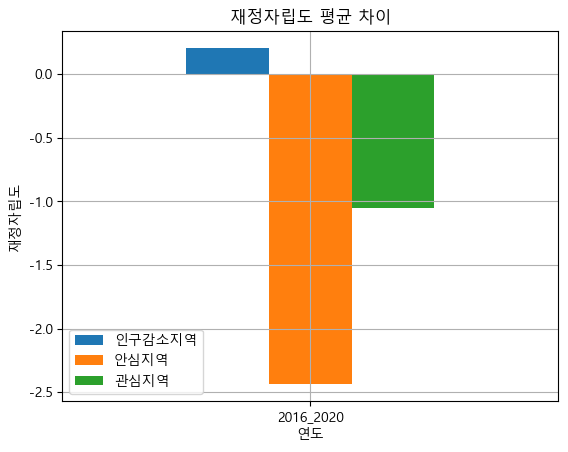

In [127]:
fiscal_1.plot(kind = "bar")
plt.grid()
plt.title("재정자립도 평균 차이")
plt.xlabel("연도")
plt.ylabel("재정자립도")
plt.xticks(rotation=0)
#plt.yticks([5,10,15,20,25,30])

In [132]:
data = {"감소지역": danger_loc_fiscal,"관심지역":att_loc_fiscal,"안심지역" : safe_loc_fiscal}
fiscal = pd.DataFrame(data)
fiscal.index = ["2016","2017","2018","2019","2020"]

In [133]:
# 데이터 반올림
fiscal.apply(lambda x : round(x,3))

,감소지역,관심지역,안심지역
2016,10.436,17.017,29.661
2017,10.510,17.628,30.545
2018,10.279,16.839,29.384
2019,9.751,16.017,28.274
2020,10.642,15.961,27.226


<AxesSubplot:>

Text(0.5, 1.0, '지역별 재정자립도 차이')

Text(0.5, 0, '연도')

Text(0, 0.5, '재정자립도 평균')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 [Text(-0.5, 0, ''),
  Text(0.0, 0, '2016'),
  Text(0.5, 0, ''),
  Text(1.0, 0, '2017'),
  Text(1.5, 0, ''),
  Text(2.0, 0, '2018'),
  Text(2.5, 0, ''),
  Text(3.0, 0, '2019'),
  Text(3.5, 0, ''),
  Text(4.0, 0, '2020'),
  Text(4.5, 0, '')])

([<matplotlib.axis.YTick at 0x14f9b1cca00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

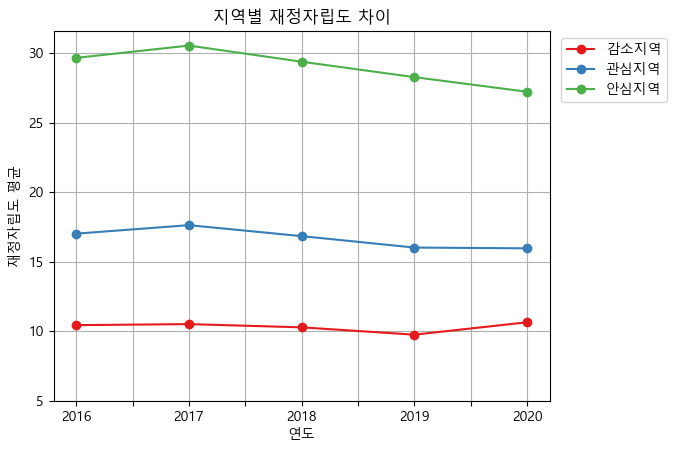

In [140]:
fiscal.plot(color = sns.set_palette('Set1'),marker = "o")
plt.grid()
plt.title("지역별 재정자립도 차이")
plt.xlabel("연도")
plt.ylabel("재정자립도 평균")
plt.xticks(rotation=0)
plt.yticks([5,10,15,20,25,30])
plt.legend(bbox_to_anchor=(1.25, 1))
plt.savefig('output/지역별 재정자립도 차이(선).png',bbox_inches="tight")

In [ ]:
# 
# 인구감소지역이 정책, 인구감소지역의 스스로 생존할 수 있는 능력이 떨어진다. 

<AxesSubplot:>

Text(0.5, 1.0, '지역별 재정자립도 차이')

Text(0.5, 0, '연도')

Text(0, 0.5, '재정자립도 평균')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2016'),
  Text(1, 0, '2017'),
  Text(2, 0, '2018'),
  Text(3, 0, '2019'),
  Text(4, 0, '2020')])

([<matplotlib.axis.YTick at 0x14f9b2c08e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

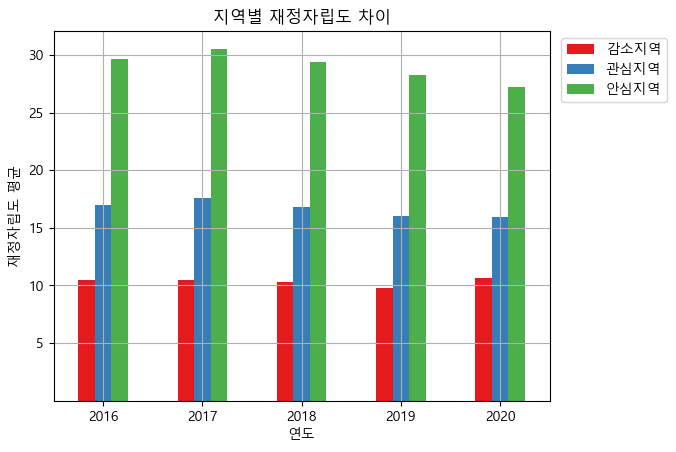

In [139]:
fiscal.plot(kind="bar",color = sns.set_palette('Set1'))
plt.grid()
plt.title("지역별 재정자립도 차이")
plt.xlabel("연도")
plt.ylabel("재정자립도 평균")
plt.xticks(rotation=0)
plt.yticks([5,10,15,20,25,30])
plt.legend(bbox_to_anchor=(1.25, 1))
plt.savefig('output/지역별 재정자립도 차이(바).png',bbox_inches="tight")